[[4.39102555 1.97027376 8.24649343 7.75344366]]
[[7.01473893 4.54386284]]
[[6.29959428 2.74159837]]
[ 6.36941438  5.414982    1.313109   ...  7.63346627 11.67612493
  7.71162986]
[6.36941438 4.81177484 7.9666497  9.92283185]
Init mean
[6.36941438 4.81177484 7.9666497  9.92283185]
Init s2
[1. 1. 1. 1.]
5 [ 5.15331894  1.56550198  7.6315226  10.03839154]
10 [4.52589233 1.18899955 7.25448457 9.88240175]
15 [4.24823324 1.02131608 7.04233224 9.78032857]
20 [4.11954134 0.94285289 6.9371441  9.72776408]
25 [4.05984289 0.9063604  6.88683533 9.70229715]
30 [4.03216717 0.8894396  6.86316065 9.69024473]
35 [4.01933727 0.88159741 6.85210557 9.68460188]
40 [4.01338892 0.87796226 6.84696232 9.68197335]
45 [4.01063081 0.87627693 6.84457364 9.68075188]
50 [4.00935188 0.87549549 6.84346518 9.6801849 ]
55 [4.00875883 0.87513314 6.84295099 9.67992186]
60 [4.00848382 0.87496511 6.84271251 9.67979985]
65 [4.00835629 0.87488719 6.84260191 9.67974327]
70 [4.00829716 0.87485106 6.84255063 9.67971703]
75 [4.00

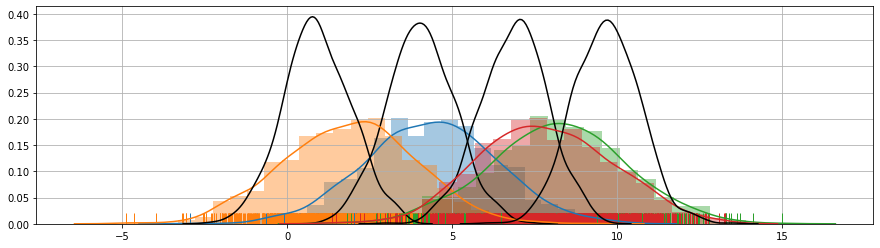

In [6]:
import numpy as np
import seaborn as sns

def h(x,H):
    d = x-H
    d = np.multiply(d,d)
    d = np.sqrt(d.sum(axis=1))
    d_col_1 = d[1]-d[0]
    d_col_2 = d[2]-d[0] 
    d_col_3 = d[3]-d[0]
    di = np.array([d_col_1,d_col_2,d_col_3])
    di = di.T
    return di

class UGMM(object):
    '''Univariate GMM with CAVI'''
    def __init__(self, X, K=2, sigma=1):
        self.X = X
        self.K = K
        self.N = self.X.shape[0]
        self.sigma2 = sigma**2

    def _init(self):
        self.phi = np.random.dirichlet([np.random.random()*np.random.randint(1, 10)]*self.K, self.N)
        K = X[0]
        K = np.append(K,X[SAMPLE])
        K = np.append(K,X[2*SAMPLE])
        K = np.append(K,X[3*SAMPLE])
        print(K)
        self.m = K
        #self.phi = K
        #print(self.phi)
        self.s2 = np.ones(self.K) #* np.random.random(self.K)
        print('Init mean')
        print(self.m)
        print('Init s2')
        print(self.s2)

    def get_elbo(self):
        t1 = np.log(self.s2) - self.m/self.sigma2
        t1 = t1.sum()
        t2 = -0.5*np.add.outer(self.X**2, self.s2+self.m**2)
        t2 += np.outer(self.X, self.m)
        t2 -= np.log(self.phi)
        t2 *= self.phi
        t2 = t2.sum()
        return t1 + t2

    def fit(self, max_iter=1000, tol=1e-10):
        self._init()
        self.elbo_values = [self.get_elbo()]
        self.m_history = [self.m]
        self.s2_history = [self.s2]
        for iter_ in range(1, max_iter+1):
            self._cavi()
            self.m_history.append(self.m)
            self.s2_history.append(self.s2)
            self.elbo_values.append(self.get_elbo())
            if iter_ % 5 == 0:
                print(iter_, self.m_history[iter_])
            if np.abs(self.elbo_values[-2] - self.elbo_values[-1]) <= tol:
                print('ELBO converged with ll %.3f at iteration %d'%(self.elbo_values[-1],
                                                                     iter_))
                break

        if iter_ == max_iter:
            print('ELBO ended with ll %.3f'%(self.elbo_values[-1]))
            print(self.elbo_values)

    def _cavi(self):
        self._update_phi()
        self._update_mu()

    def _update_phi(self):
        t1 = np.outer(self.X, self.m)
        t2 = -(0.5*self.m**2 + 0.5*self.s2)
        exponent = t1 + t2[np.newaxis, :]
        self.phi = np.exp(exponent)
        self.phi = self.phi / self.phi.sum(1)[:, np.newaxis]

    def _update_mu(self):
        self.m = (self.phi*self.X[:, np.newaxis]).sum(0) * (1/self.sigma2 + self.phi.sum(0))**(-1)
        assert self.m.size == self.K
        #print(self.m)
        self.s2 = (1/self.sigma2 + self.phi.sum(0))**(-1)
        assert self.s2.size == self.K

import os
import psutil

def _check_usage_of_cpu_and_memory():
    
    pid = os.getpid()
    py  = psutil.Process(pid)
    
    cpu_usage   = os.popen("ps aux | grep " + str(pid) + " | grep -v grep | awk '{print $3}'").read()
    cpu_usage   = cpu_usage.replace("\n","")
    
    memory_usage  = round(py.memory_info()[0] /2.**30, 2)
    
    print("cpu usage\t\t:", cpu_usage, "%")
    print("memory usage\t\t:", memory_usage, "%")
        
        
def tri(zd, H):
    zd = zd.T
    H=H-H[0]
    tmp = zd[0]
    tmp = tmp * tmp
    zd = np.delete(zd,(0), axis=0)
    r1=np.multiply(zd,zd)
    Ha=np.delete(H,(0), axis=0)
    K=np.multiply(Ha,Ha)
    K=K.sum(axis=1)
    b= 0.5*(K-r1+tmp) 
    S_inv = np.linalg.inv(Ha.T*Ha)*Ha.T
    x_hat = S_inv*b
    return x_hat

import matplotlib.pyplot as plt
import seaborn as sns

from openpyxl import Workbook
write_wb = Workbook()
 
#이름이 있는 시트를 생성
#write_ws = write_wb.create_sheet('생성시트') 
#Sheet1에다 입력

bias = 0
std = 2

x = np.array([7.54,4.8])
H = np.array([[7.54,0],[7.54,7.21],[14.14,0],[14.14,7.58]])
H2 = np.matrix([[7.54,0],[7.54,7.21],[14.14,0],[14.14,7.58]])
d = x-H
d = np.multiply(d,d)
d = np.sqrt(d.sum(axis=1))

d[0] = d[0] + np.random.normal(bias,1,1)
d[1] = d[1] + np.random.normal(bias,1,1)
d[2] = d[2] + np.random.normal(bias,1,1)
d[3] = d[3] + np.random.normal(bias,1,1)
zd = np.matrix([d[0],d[1],d[2],d[3]])
zd2 = np.matrix([[3.49142346, 5.25530309, 8.65771068, 9.22955042]])
print(zd)
x_hat = tri(zd,H2)
x_hat = x_hat.T+H[0]
print(x_hat)
x_hat = tri(zd2,H2)
x_hat = x_hat.T+H[0]
print(x_hat)
#X1 = d[0] + gibbs_sampling(0,std,SAMPLE)

SAMPLE = 1000
X1 = d[0] + np.random.normal(0,std,SAMPLE)#np.random.normal(loc=d[0], scale=std, size=SAMPLE)
X2 = d[1] + np.random.normal(0,std,SAMPLE)#np.random.normal(loc=d[1], scale=std, size=SAMPLE)
X3 = d[2] + np.random.normal(0,std,SAMPLE)#np.random.normal(loc=d[2], scale=std, size=SAMPLE)
X4 = d[3] + np.random.normal(0,std,SAMPLE)#np.random.normal(loc=d[3], scale=std, size=SAMPLE)
X1 = X1.T
X2 = X2.T
X3 = X3.T
X4 = X4.T
X = np.append(X1,X2)
X = np.append(X,X3)
X = np.append(X,X4)
print(X)

#for i, mu in enumerate(mu_arr[1:]):
#    X = np.append(X, np.random.normal(loc=mu, scale=1, size=SAMPLE))
import time
start = time.time()
ugmm = UGMM(X, 4)
ugmm.fit()
ugmm.phi.argmax(1)
zd = np.matrix([ugmm.m[1],ugmm.m[0],ugmm.m[2],ugmm.m[3]])
x_hat = tri(zd,H2)
x_hat = x_hat.T+H[0]
print(x_hat)
_check_usage_of_cpu_and_memory()
print("time :", time.time() - start)
#write_ws = write_wb.active
#write_ws['A1'] = 'REAL'
#write_ws['C1'] = 'VI'
#행 단위로 추가
#write_ws.append([1,2,3])
#셀 단위로 추가
#write_ws.cell(i,1,x_hat(0,0))
#write_ws.cell(i,2,x_hat(0,1))
#write_wb.save('/Users/swbaek/Desktop/VI.xlsx')
#sorted(mu_arr)
#sorted(ugmm.m)
#for i in range(0,3)
x_init = np.array([1,1])

fig, ax = plt.subplots(figsize=(15, 4))
plt.grid()
sns.distplot(X[:SAMPLE], ax=ax, hist=True, rug = True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[0], 1, SAMPLE), color='k', hist=False, kde=True)
sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, hist=True,rug = True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[1], 1, SAMPLE), color='k', hist=False, kde=True)
sns.distplot(X[SAMPLE*2:SAMPLE*3], ax=ax, hist=True,rug = True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[2], 1, SAMPLE), color='k', hist=False, kde=True)
sns.distplot(X[SAMPLE*3:], ax=ax, hist=True, rug = True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[3], 1, SAMPLE), color='k', hist=False, kde=True)
#print(ugmm.m_history)


In [57]:
print(X[0])

6.88655125528638


In [14]:
K = X[0]
K = np.append(K,X[SAMPLE])
K = np.append(K,X[2*SAMPLE])
K = np.append(K,X[3*SAMPLE])
print(K)

[6.89828027 3.32803102 7.0258703  4.69247879]


In [103]:
print(np.random.randint(1, 10))

6


In [99]:
from scipy.stats import boltzmann
N = 100
lambda_ = 1.4
print(boltzmann.rvs(lambda_, N, size=10))

[0 0 1 0 0 1 0 0 0 0]


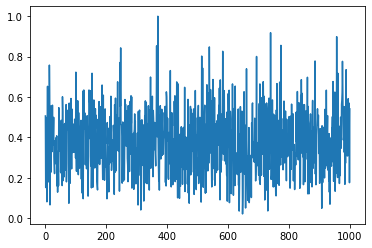

In [191]:
from scipy.stats import maxwell
r = maxwell.rvs(size=1000)
r_max = max(r)
r=(r/r_max)
x = np.linspace(1,1000, num = 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, r)

0.3388684138410027
3.3682141752187276


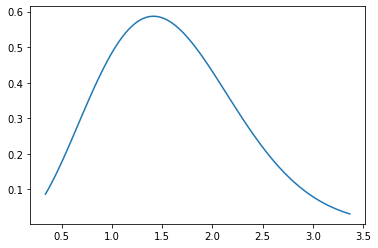

In [193]:
x = np.linspace(maxwell.ppf(0.01),
                maxwell.ppf(0.99), 100)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(x, maxwell.pdf(x))
print(maxwell.ppf(0.01))
print(maxwell.ppf(0.99))